**REGULARIZED MULTIPLE LINEAR REGRESSION USING GRADIENT DESCENT**


X_train Type:  <class 'numpy.ndarray'>  X_train Shape:  (400, 14)
X_test Type:  <class 'numpy.ndarray'>  X_test Shape:  (106, 14)
Type of theta:  <class 'numpy.ndarray'>  Shape:  (14,)
Theta:  [ 2.43334633e+01 -9.61087798e-01  8.72093733e-01 -3.72375988e-02
  5.73070102e-01 -1.12066434e+00  3.67070690e+00 -2.37430979e-02
 -2.40804371e+00  1.94389554e+00 -1.02855724e+00 -1.63877731e+00
  7.20348815e-02 -3.41596519e+00]
Theta Shape:  (14,)
Mean Absolute Error:  4.668208512582628
Mean Squared Error:  31.52552031940651


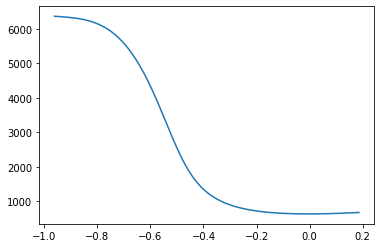

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,metrics
from sklearn.preprocessing import StandardScaler

X,y=datasets.load_boston(return_X_y=True)

X_train_temp1=X[0:400,:]
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1
print("X_train Type: ",type(X_train)," X_train Shape: ",X_train.shape)
y_train=y[0:400]

#validation data
X_test_temp1=X[400:506,:]
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1
print("X_test Type: ",type(X_test)," X_test Shape: ",X_test.shape)
y_test=y[400:506]

#preprocessing
scaler=StandardScaler() #or MinMax
scaler.fit(X_train[:,1:])
X_train[:,1:]=scaler.transform(X_train[:,1:])
X_test[:,1:]=scaler.transform(X_test[:,1:])

#implementing gradient descent with regularization
theta=np.random.uniform(0,1,size=(X_train.shape[1]))
print("Type of theta: ",type(theta)," Shape: ",theta.shape)
niterations=1000 
alpha=0.01
m=X_train.shape[0]
n=X_train.shape[1]
lambda1=10 #hyperparameter
cost=[]
theta1=[]
for i in range(niterations):
    update=np.zeros(X_train.shape[1])
    ypred=np.dot(X_train,theta)
    error=ypred-y_train
    for j in range(n):
        update[j]= np.sum(error*(X_train.T)[j])       
    theta[0]=theta[0]-(1/m)*(alpha)*update[0]
    theta[1:]=theta[1:]*(1-(alpha*lambda1/m))-(1/m)*(alpha)*update[1:]
    theta1.append(theta[1])
    cost.append(np.sum((np.dot(X_train,theta)-y_train)**2)/m+lambda1*np.sum(np.dot(theta,theta)))
print("Theta: ", theta)
print("Theta Shape: ", theta.shape)
predictions=np.dot(X_test,theta)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(y_true = y_test, y_pred = predictions))
plt.plot(theta1, cost)

**REGULARIZED MULTIPLE LINEAR REGRESSION USING NORMAL EQUATION**


In [ ]:
#regularizing normal equation for multiple linear regression
import numpy as np
from sklearn import datasets, metrics
from numpy.linalg import inv, pinv, LinAlgError

lambda1 = 10

side_matrix = np.zeros((X_train.shape[1], X_train.shape[1]))
for i in range (1, X_train.shape[1]):
    side_matrix[i, i] = 1

theta = np.zeros(X_train.shape[1])

XTXi = inv(np.dot(X_train.T, X_train) + lambda1 * side_matrix) 

XTy = np.dot(X_train.T, y_train)

theta = np.dot(XTXi, XTy)

print("Thetas: ", theta)
print("Theta's shape: ", theta.shape)

predictions = np.dot(theta, X_test.T)

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_true = y_test, y_pred = predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(y_true = y_test, y_pred = predictions))

Thetas:  [ 2.43345000e+01 -6.34132074e-01  1.87120245e-01 -5.31283090e-01
  9.84791261e-01  1.76434833e-01  5.38262827e-01 -1.44542528e+00
  3.58522574e+00  4.13806426e-02 -2.56985080e+00  2.38526385e+00
 -1.57461675e+00 -1.71312537e+00  1.46934771e-02 -3.48110753e+00]
Theta's shape:  (16,)
Mean Absolute Error:  4.845706070264388
Mean Squared Error:  34.223734786375644
